<a href="https://colab.research.google.com/github/Kanika1201/ML-Project-2/blob/main/Part1_All_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [129]:
#import librarires
import pandas as pd
import numpy as np

#visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Time
import time

In [130]:
pip install torchinfo

## Step 1

In [131]:
# Reading dataset
df = pd.read_csv("dataset.csv")
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [132]:
#printing info about dataaset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [133]:
# handling mislabeled values
for col in df.columns:
    df[col] = pd.to_numeric(df[col] , errors = 'coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      760 non-null    float64
 1   f2      760 non-null    float64
 2   f3      760 non-null    int64  
 3   f4      760 non-null    float64
 4   f5      760 non-null    float64
 5   f6      760 non-null    float64
 6   f7      760 non-null    float64
 7   target  760 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 53.4 KB


In [134]:
# data feature
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


## Visualisation

### 1. Heatmap

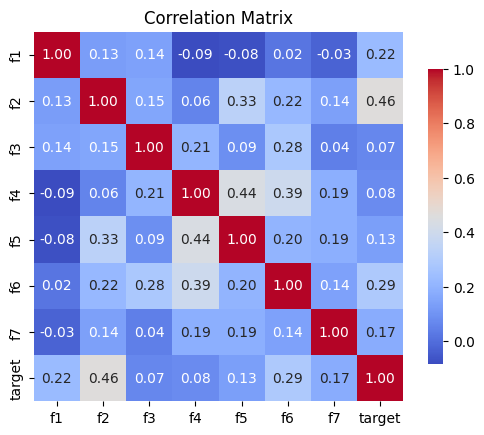

In [135]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

#### 2. Box Plot for Outlinears in every feature

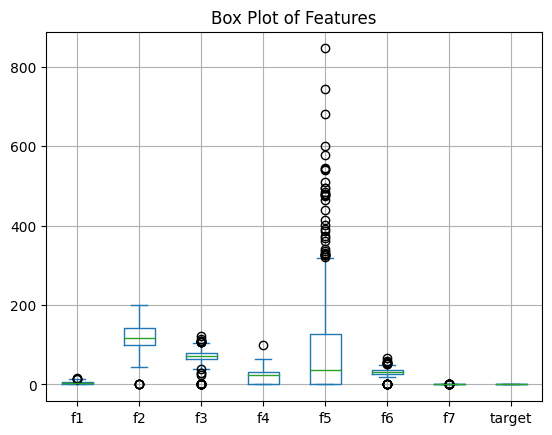

In [136]:
df.plot(kind='box', grid=True)
plt.title('Box Plot of Features')
plt.show()

#### 3. Distribution of Target variable

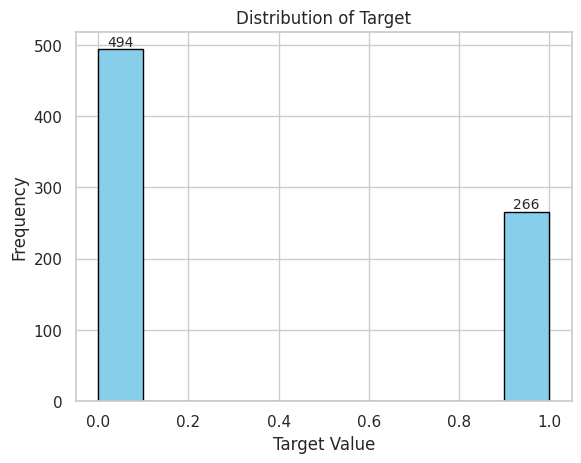

In [192]:
counts, bins, patches = plt.hist(df['target'], color='skyblue', edgecolor='black')
for count, x in zip(counts, bins):
    if count>0:
      bin_width = bins[1] - bins[0]
      plt.text(x + bin_width / 2, count, int(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Target')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

#### 4. Feature Distribution

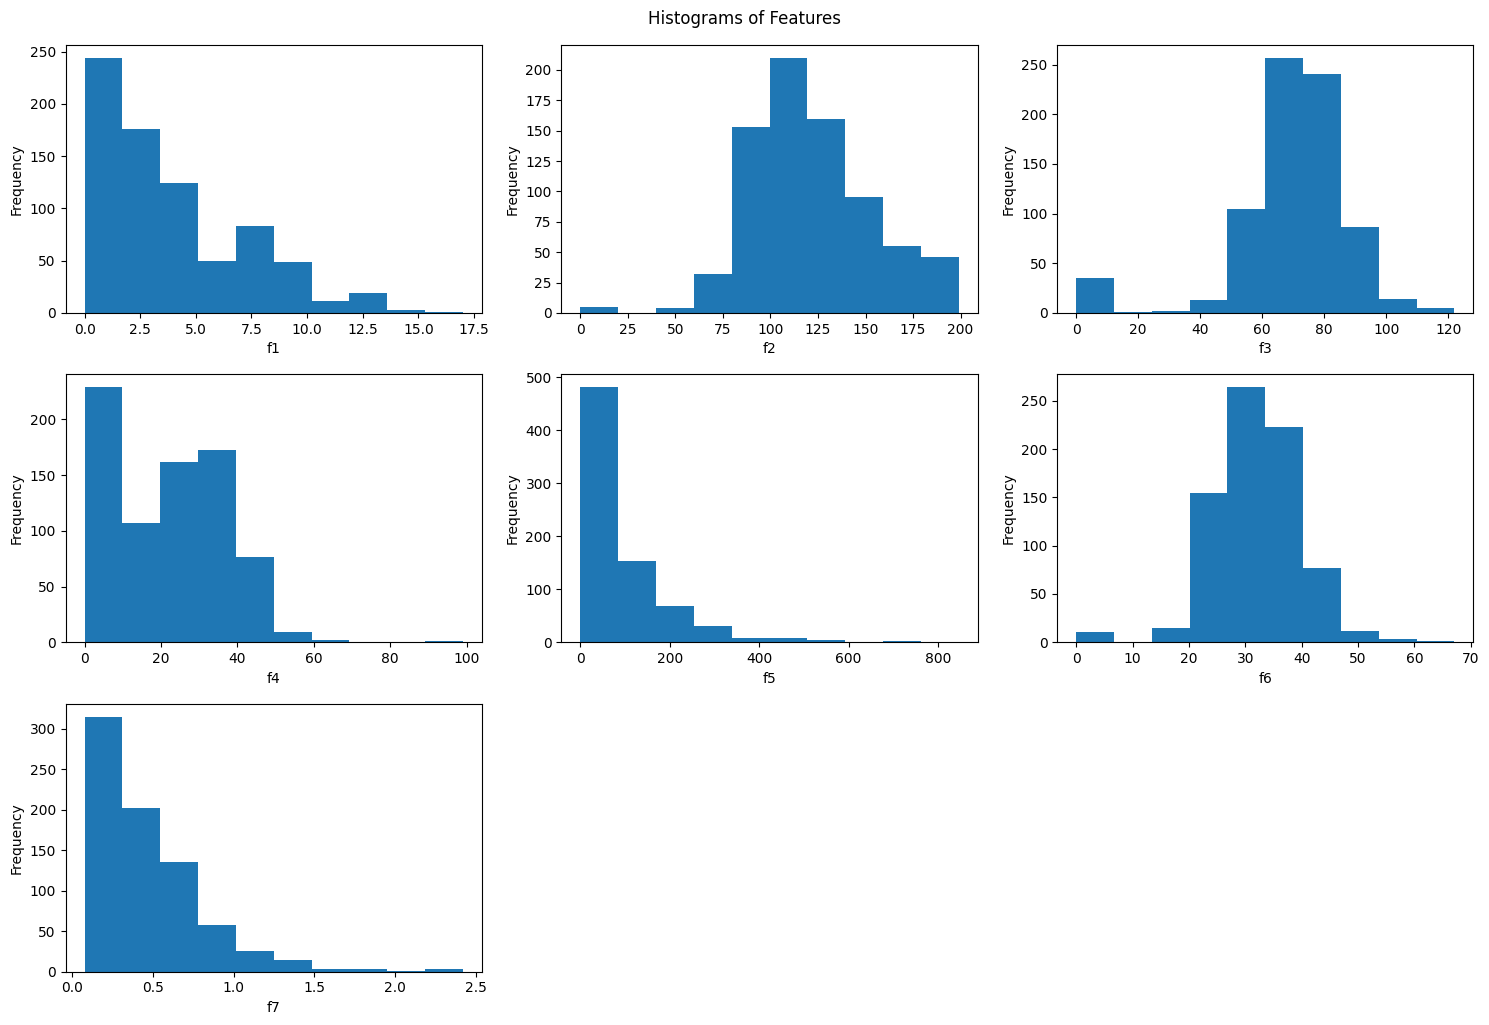

In [138]:
feature_col = ["f1", "f2", "f3", "f4", "f5", "f6", "f7"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_col):
    axes[i].hist(df[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(feature_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

### Step 2 - Preprocessing and Splitting Dataset

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [140]:
feature_col = ["f1" , "f2" , "f3" , "f4" , "f5" , "f6" , "f7"]

In [141]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_col]) , columns=feature_col)
df_scaled["target"] = df["target"]
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1


In [142]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

In [143]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=16, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7, shuffle=True)

In [ ]:
X_train.to_csv("X_train.csv" , index=False)
y_train.to_csv("y_train.csv" , index=False)

X_val.to_csv("X_val.csv" , index=False)
y_val.to_csv("y_val.csv" , index=False)

X_test.to_csv("X_test.csv" , index=False)
y_test.to_csv("y_test.csv" , index=False)

In [144]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


print("Training Tensor Shape:", X_train_tensor.shape)
print("Validation Tensor Shape:", X_val_tensor.shape)
print("Test Tensor Shape:", X_test_tensor.shape)

Training Tensor Shape: torch.Size([532, 7])
Validation Tensor Shape: torch.Size([114, 7])
Test Tensor Shape: torch.Size([114, 7])


## Step 3: Defining the Neural Network

In [145]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import random

# Set the seed for reproducibility
seed = 40
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Define the SimpleNN class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  # Output layer with Sigmoid activation
        return x

# Instantiate the model
model = SimpleNN()

# Display a summary of the model
summary(model, input_size=(1, 7))


Layer (type:depth-idx)                   Output Shape              Param #
SimpleNN                                 [1, 1]                    --
├─Linear: 1-1                            [1, 64]                   512
├─Dropout: 1-2                           [1, 64]                   --
├─Linear: 1-3                            [1, 64]                   4,160
├─Dropout: 1-4                           [1, 64]                   --
├─Linear: 1-5                            [1, 64]                   4,160
├─Linear: 1-6                            [1, 1]                    65
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

## Step 4: Training the Neural Network

In [146]:
# loss function and optimizer
# We have used BCELoss and Adam optimizer
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
best_model_path = "best_model.pth"  # This will save the file in the current directory

In [147]:
# Training the model
def train(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs, batch_size=32):
    train_loss = []
    val_loss_list = []
    val_acc_list = []
    train_acc_list = []

    # Track the best validation accuracy
    best_val_acc = 0.0

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    start_time = time.time()

    for epoch in range(epochs):
        # Training
        model.train()
        epoch_loss = 0.0

        correct_pred = 0
        total_pred = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            pred = torch.round(outputs)
            correct_pred += (pred == labels).sum().item()
            total_pred += labels.size(0)

        # Average loss
        avg_train_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_train_loss)

        # training accuracy
        train_acc = correct_pred / total_pred
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor).squeeze()
            val_loss = loss_function(val_outputs, y_val_tensor)
            val_loss_list.append(val_loss.item())

            val_pred = torch.round(val_outputs)
            val_acc = accuracy_score(y_val_tensor.numpy(), val_pred.numpy())
            val_acc_list.append(val_acc)

            # Save the model if validation accuracy improves
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(model.state_dict(), best_model_path)  # Save best model
                print(f"New best model saved at epoch {epoch+1} with validation accuracy {val_acc:.4f}")


        # training and validation results
        print(f'Epoch {epoch + 1}/{epochs}, '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {val_loss.item():.4f}, '
              f'Validation Accuracy: {val_acc:.4f}')

    print(f'Training Complete. Time taken: {time.time() - start_time:.2f} seconds.')
    print(f'Best Validation Accuracy: {best_val_acc:.4f}')

    return train_loss, val_loss_list, val_acc_list, train_acc_list

train_loss, val_loss_list, val_acc_list, train_acc_list = train(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=20)

New best model saved at epoch 1 with validation accuracy 0.5526
Epoch 1/20, Train Loss: 0.6922, Validation Loss: 0.6909, Validation Accuracy: 0.5526
New best model saved at epoch 2 with validation accuracy 0.6404
Epoch 2/20, Train Loss: 0.6878, Validation Loss: 0.6862, Validation Accuracy: 0.6404
New best model saved at epoch 3 with validation accuracy 0.7105
Epoch 3/20, Train Loss: 0.6826, Validation Loss: 0.6814, Validation Accuracy: 0.7105
Epoch 4/20, Train Loss: 0.6778, Validation Loss: 0.6765, Validation Accuracy: 0.6930
New best model saved at epoch 5 with validation accuracy 0.7193
Epoch 5/20, Train Loss: 0.6717, Validation Loss: 0.6713, Validation Accuracy: 0.7193
Epoch 6/20, Train Loss: 0.6636, Validation Loss: 0.6653, Validation Accuracy: 0.7105
Epoch 7/20, Train Loss: 0.6549, Validation Loss: 0.6585, Validation Accuracy: 0.6842
Epoch 8/20, Train Loss: 0.6495, Validation Loss: 0.6509, Validation Accuracy: 0.6842
Epoch 9/20, Train Loss: 0.6436, Validation Loss: 0.6427, Validat

In [148]:
model.load_state_dict(torch.load('best_model.pth'))

<ipython-input-148-97ca0473330f>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

In [149]:
# Test the model
def eval(model, X_test_tensor, y_test_tensor):
    model.eval()  # evaluation mode
    test_loss_list=[]

    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        pred = torch.round(test_outputs)
        test_loss = loss_function(test_outputs, y_test_tensor)
        test_loss_list.append(test_loss.item())

        acc = accuracy_score(y_test_tensor.numpy(), pred.numpy())
        prec, recall, f1, _ = precision_recall_fscore_support(y_test_tensor.numpy(), pred.numpy(), average='binary')

        y_true = y_test_tensor.numpy()
        y_pred = pred.numpy()

        print(f'Test Accuracy: {acc:.3f}')
        print(f'Test Precision: {prec:.3f}')
        print(f'Test Recall: {recall:.3f}')
        print(f'Test F1 Score: {f1:.3f}')

        return acc, prec, recall, f1, test_loss_list, y_true, y_pred, test_outputs  # Return metrics


accuracy, precision, recall, f1, test_loss, y_true, y_pred, test_outputs =eval(model, X_test_tensor, y_test_tensor)

Test Accuracy: 0.781
Test Precision: 0.800
Test Recall: 0.432
Test F1 Score: 0.561


#### Visualization

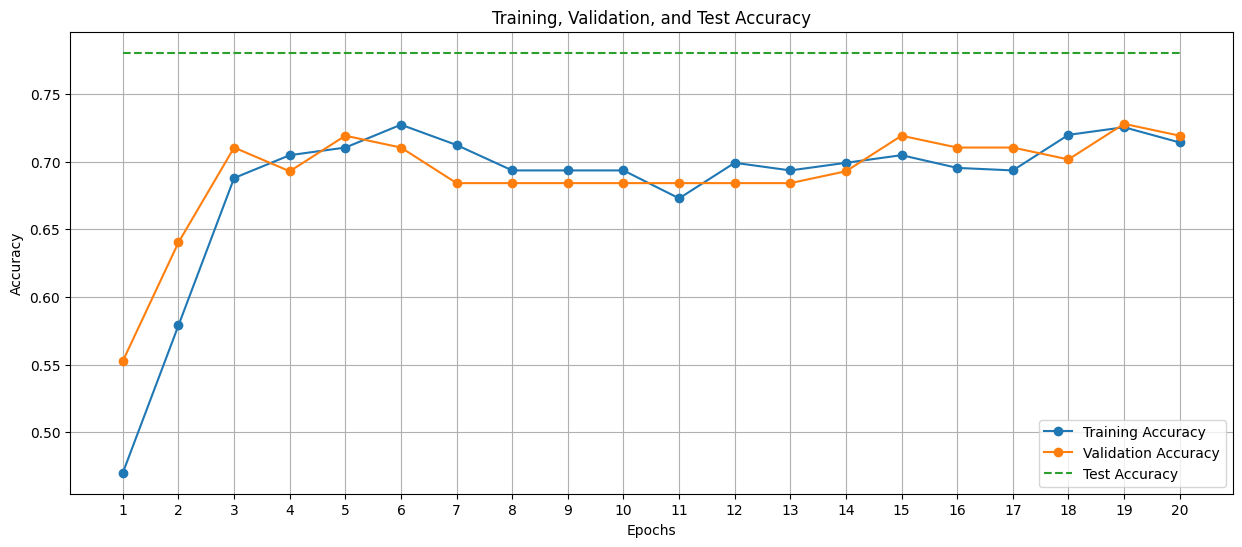

In [150]:
plt.figure(figsize=(15, 6))
test_acc_list = [accuracy] * len(train_acc_list)
epochs = range(1, len(train_acc_list) + 1)

plt.plot(epochs, train_acc_list, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc_list, label='Validation Accuracy', marker='o')
plt.plot(epochs, test_acc_list, label='Test Accuracy', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()
plt.xticks(epochs)
plt.show()

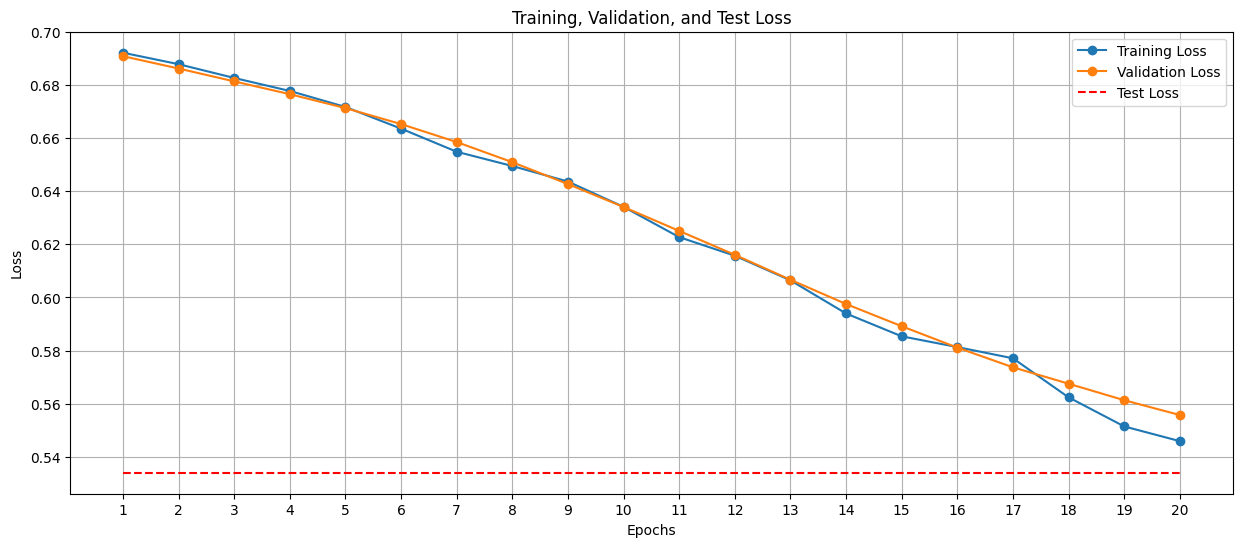

In [151]:
plt.figure(figsize=(15, 6))
test_loss_list = [test_loss] * len(train_acc_list)

plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss_list, label='Validation Loss', marker='o')
plt.plot(epochs, test_loss_list, label='Test Loss', color='red', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()
plt.xticks(epochs)
plt.show()

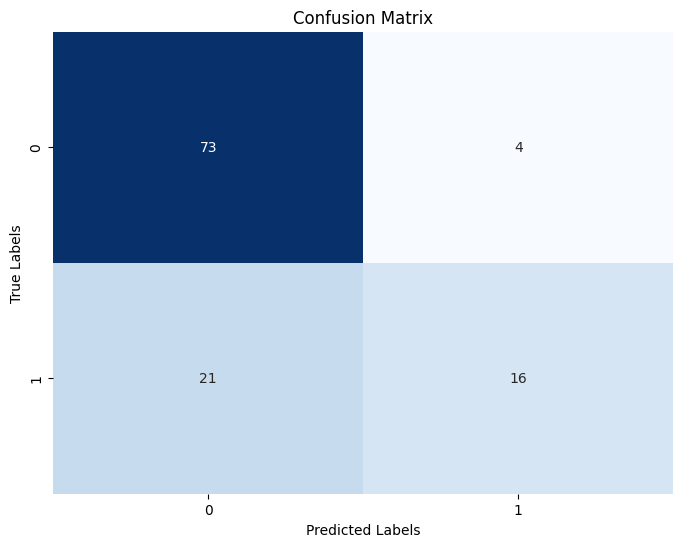

In [152]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

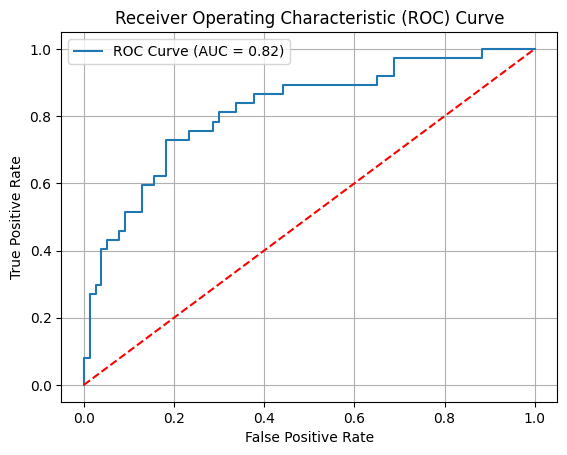

In [153]:
fpr, tpr, _ = roc_curve(y_true, test_outputs.numpy())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Part 2

#### 1. Changing Learning Rate Hyperparameter

Training with Learning Rate: 0.0001
New best model saved at epoch 1 with validation accuracy 0.7193
Epoch 1/20, Train Loss: 0.5448, Validation Loss: 0.5571, Validation Accuracy: 0.7193
Epoch 2/20, Train Loss: 0.5385, Validation Loss: 0.5529, Validation Accuracy: 0.7193
Epoch 3/20, Train Loss: 0.5376, Validation Loss: 0.5494, Validation Accuracy: 0.7193
Epoch 4/20, Train Loss: 0.5322, Validation Loss: 0.5461, Validation Accuracy: 0.7193
Epoch 5/20, Train Loss: 0.5335, Validation Loss: 0.5432, Validation Accuracy: 0.7193
Epoch 6/20, Train Loss: 0.5178, Validation Loss: 0.5403, Validation Accuracy: 0.7193
Epoch 7/20, Train Loss: 0.5284, Validation Loss: 0.5376, Validation Accuracy: 0.7193
Epoch 8/20, Train Loss: 0.5171, Validation Loss: 0.5350, Validation Accuracy: 0.7193
Epoch 9/20, Train Loss: 0.5218, Validation Loss: 0.5328, Validation Accuracy: 0.7193
Epoch 10/20, Train Loss: 0.5167, Validation Loss: 0.5313, Validation Accuracy: 0.7193
Epoch 11/20, Train Loss: 0.5194, Validation Loss:

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))


New best model saved at epoch 2 with validation accuracy 0.7193
Epoch 2/20, Train Loss: 0.5136, Validation Loss: 0.5340, Validation Accuracy: 0.7193
Epoch 3/20, Train Loss: 0.5012, Validation Loss: 0.5255, Validation Accuracy: 0.7105
Epoch 4/20, Train Loss: 0.4916, Validation Loss: 0.5205, Validation Accuracy: 0.7105
Epoch 5/20, Train Loss: 0.5002, Validation Loss: 0.5154, Validation Accuracy: 0.7193
New best model saved at epoch 6 with validation accuracy 0.7368
Epoch 6/20, Train Loss: 0.4843, Validation Loss: 0.5122, Validation Accuracy: 0.7368
Epoch 7/20, Train Loss: 0.4898, Validation Loss: 0.5108, Validation Accuracy: 0.7368
Epoch 8/20, Train Loss: 0.4883, Validation Loss: 0.5110, Validation Accuracy: 0.7281
Epoch 9/20, Train Loss: 0.4792, Validation Loss: 0.5074, Validation Accuracy: 0.7281
Epoch 10/20, Train Loss: 0.4990, Validation Loss: 0.5035, Validation Accuracy: 0.7368
Epoch 11/20, Train Loss: 0.4937, Validation Loss: 0.5027, Validation Accuracy: 0.7281
Epoch 12/20, Train L

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))


Epoch 3/20, Train Loss: 0.5124, Validation Loss: 0.5045, Validation Accuracy: 0.7281
Epoch 4/20, Train Loss: 0.4849, Validation Loss: 0.5060, Validation Accuracy: 0.7281
Epoch 5/20, Train Loss: 0.4735, Validation Loss: 0.5033, Validation Accuracy: 0.7281
Epoch 6/20, Train Loss: 0.4934, Validation Loss: 0.5023, Validation Accuracy: 0.7193
Epoch 7/20, Train Loss: 0.4806, Validation Loss: 0.5021, Validation Accuracy: 0.7281
Epoch 8/20, Train Loss: 0.4765, Validation Loss: 0.5005, Validation Accuracy: 0.7281
New best model saved at epoch 9 with validation accuracy 0.7368
Epoch 9/20, Train Loss: 0.4672, Validation Loss: 0.5014, Validation Accuracy: 0.7368
Epoch 10/20, Train Loss: 0.4740, Validation Loss: 0.5041, Validation Accuracy: 0.7281
Epoch 11/20, Train Loss: 0.4822, Validation Loss: 0.5005, Validation Accuracy: 0.7281
Epoch 12/20, Train Loss: 0.4739, Validation Loss: 0.5015, Validation Accuracy: 0.7281
New best model saved at epoch 13 with validation accuracy 0.7456
Epoch 13/20, Train

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))


New best model saved at epoch 3 with validation accuracy 0.7544
Epoch 3/20, Train Loss: 0.4630, Validation Loss: 0.4987, Validation Accuracy: 0.7544
Epoch 4/20, Train Loss: 0.4692, Validation Loss: 0.4976, Validation Accuracy: 0.7368
Epoch 5/20, Train Loss: 0.4577, Validation Loss: 0.5006, Validation Accuracy: 0.7368
Epoch 6/20, Train Loss: 0.4678, Validation Loss: 0.5033, Validation Accuracy: 0.7456
Epoch 7/20, Train Loss: 0.4663, Validation Loss: 0.5043, Validation Accuracy: 0.7456
Epoch 8/20, Train Loss: 0.4646, Validation Loss: 0.5102, Validation Accuracy: 0.7281
Epoch 9/20, Train Loss: 0.4664, Validation Loss: 0.5023, Validation Accuracy: 0.7368
Epoch 10/20, Train Loss: 0.4717, Validation Loss: 0.5023, Validation Accuracy: 0.7456
Epoch 11/20, Train Loss: 0.4690, Validation Loss: 0.5020, Validation Accuracy: 0.7456
Epoch 12/20, Train Loss: 0.4558, Validation Loss: 0.4982, Validation Accuracy: 0.7456
Epoch 13/20, Train Loss: 0.4509, Validation Loss: 0.4996, Validation Accuracy: 0.72

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))


Epoch 3/20, Train Loss: 0.4774, Validation Loss: 0.5109, Validation Accuracy: 0.7281
Epoch 4/20, Train Loss: 0.4689, Validation Loss: 0.5092, Validation Accuracy: 0.7281
New best model saved at epoch 5 with validation accuracy 0.7544
Epoch 5/20, Train Loss: 0.4806, Validation Loss: 0.5017, Validation Accuracy: 0.7544
Epoch 6/20, Train Loss: 0.4676, Validation Loss: 0.5021, Validation Accuracy: 0.7193
Epoch 7/20, Train Loss: 0.4585, Validation Loss: 0.4921, Validation Accuracy: 0.7456
Epoch 8/20, Train Loss: 0.4568, Validation Loss: 0.5030, Validation Accuracy: 0.7281
Epoch 9/20, Train Loss: 0.4733, Validation Loss: 0.4989, Validation Accuracy: 0.7368
Epoch 10/20, Train Loss: 0.4472, Validation Loss: 0.5072, Validation Accuracy: 0.7281
Epoch 11/20, Train Loss: 0.4440, Validation Loss: 0.4993, Validation Accuracy: 0.7368
Epoch 12/20, Train Loss: 0.4524, Validation Loss: 0.5089, Validation Accuracy: 0.7281
Epoch 13/20, Train Loss: 0.4700, Validation Loss: 0.5006, Validation Accuracy: 0.72

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))


Epoch 2/20, Train Loss: 0.5071, Validation Loss: 0.4923, Validation Accuracy: 0.7281
Epoch 3/20, Train Loss: 0.4916, Validation Loss: 0.4998, Validation Accuracy: 0.7193
Epoch 4/20, Train Loss: 0.4693, Validation Loss: 0.5022, Validation Accuracy: 0.7281
Epoch 5/20, Train Loss: 0.4675, Validation Loss: 0.4961, Validation Accuracy: 0.7281
Epoch 6/20, Train Loss: 0.4597, Validation Loss: 0.5119, Validation Accuracy: 0.7281
Epoch 7/20, Train Loss: 0.4638, Validation Loss: 0.5156, Validation Accuracy: 0.7281
Epoch 8/20, Train Loss: 0.4503, Validation Loss: 0.4970, Validation Accuracy: 0.7281
New best model saved at epoch 9 with validation accuracy 0.7456
Epoch 9/20, Train Loss: 0.4528, Validation Loss: 0.5181, Validation Accuracy: 0.7456
Epoch 10/20, Train Loss: 0.4620, Validation Loss: 0.5087, Validation Accuracy: 0.7281
New best model saved at epoch 11 with validation accuracy 0.7544
Epoch 11/20, Train Loss: 0.4395, Validation Loss: 0.5091, Validation Accuracy: 0.7544
Epoch 12/20, Train 

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))


New best model saved at epoch 2 with validation accuracy 0.7105
Epoch 2/20, Train Loss: 0.4611, Validation Loss: 0.5257, Validation Accuracy: 0.7105
New best model saved at epoch 3 with validation accuracy 0.7456
Epoch 3/20, Train Loss: 0.4616, Validation Loss: 0.4922, Validation Accuracy: 0.7456
Epoch 4/20, Train Loss: 0.4330, Validation Loss: 0.5023, Validation Accuracy: 0.7368
Epoch 5/20, Train Loss: 0.4464, Validation Loss: 0.4903, Validation Accuracy: 0.7281
Epoch 6/20, Train Loss: 0.4390, Validation Loss: 0.4877, Validation Accuracy: 0.7456
Epoch 7/20, Train Loss: 0.4392, Validation Loss: 0.5118, Validation Accuracy: 0.7281
Epoch 8/20, Train Loss: 0.4677, Validation Loss: 0.5520, Validation Accuracy: 0.7193
Epoch 9/20, Train Loss: 0.4745, Validation Loss: 0.5271, Validation Accuracy: 0.7193
Epoch 10/20, Train Loss: 0.4596, Validation Loss: 0.5058, Validation Accuracy: 0.7281
Epoch 11/20, Train Loss: 0.4413, Validation Loss: 0.5369, Validation Accuracy: 0.7193
Epoch 12/20, Train L

<ipython-input-154-2a3cad96e482>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr.pth'))



Test Recall: 0.622
Test F1 Score: 0.639


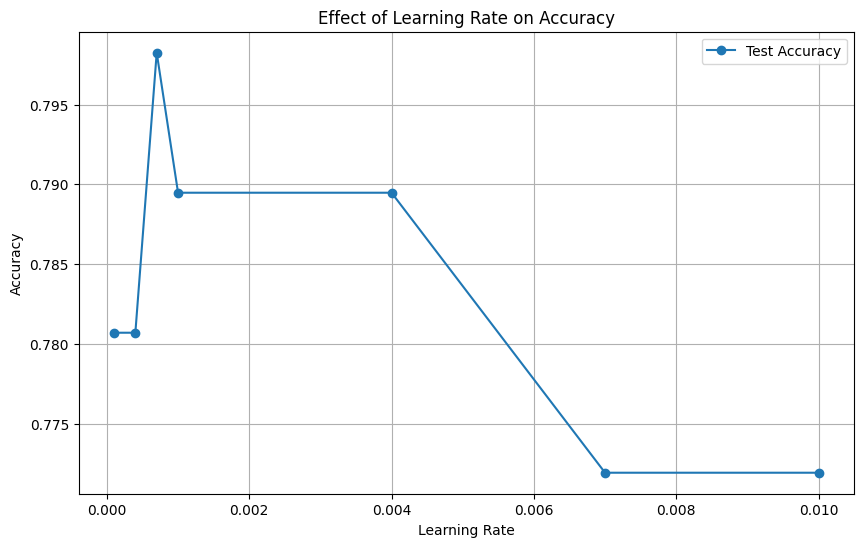

In [154]:
test_accuracies = []
learning_rates = [0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01] # Skip the learning rate already used in part 1
accuracy_with_lr=[]

for rate in learning_rates:
  print(f"Training with Learning Rate: {rate}")

  # Define Hyperparameters
  loss_function = nn.BCELoss()
  optimizer = optim.Adam(model.parameters(), lr=rate)
  best_model_path = "best_model_lr.pth"

  # Train
  train_loss, val_loss_list, val_acc_list, train_acc_list = train(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=20)

  model.load_state_dict(torch.load('best_model_lr.pth'))

  # Test
  accuracy, precision, recall, f1, test_loss, y_true, y_pred, test_outputs =eval(model, X_test_tensor, y_test_tensor)

  # combine accuracies
  test_accuracies.append(accuracy)

  # Store accuracy and corresponding learning rate
  accuracy_with_lr.append((rate, accuracy))


# Plot
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Effect of Learning Rate on Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
# top 3 learning rates
accuracy_with_lr.sort(key=lambda x: x[1], reverse=True)

# Output the best three setups for learning rates
print("Top 3 Learning Rates with Best Test Accuracy:")
for i in range(3):
    print(f"Learning Rate: {accuracy_with_lr[i][0]}, Test Accuracy: {accuracy_with_lr[i][1]:.4f}")

Top 3 Learning Rates with Best Test Accuracy:
Learning Rate: 0.0007, Test Accuracy: 0.7982
Learning Rate: 0.001, Test Accuracy: 0.7895
Learning Rate: 0.004, Test Accuracy: 0.7895


#### 2. Other 3 Hyperparameters

Chosen Hyperparameter 1 : Optimizer

In [177]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import random

# Set the seed for reproducibility
seed = 40
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Define the SimpleNN class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  # Output layer with Sigmoid activation
        return x

# Instantiate the model
model = SimpleNN()

# Display a summary of the model
summary(model, input_size=(1, 7))


Layer (type:depth-idx)                   Output Shape              Param #
SimpleNN                                 [1, 1]                    --
├─Linear: 1-1                            [1, 64]                   512
├─Dropout: 1-2                           [1, 64]                   --
├─Linear: 1-3                            [1, 64]                   4,160
├─Dropout: 1-4                           [1, 64]                   --
├─Linear: 1-5                            [1, 64]                   4,160
├─Linear: 1-6                            [1, 1]                    65
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

Training with Optimizer: SGD
New best model saved at epoch 1 with validation accuracy 0.3860
Epoch 1/50, Train Loss: 0.6944, Validation Loss: 0.6951, Validation Accuracy: 0.3860
New best model saved at epoch 2 with validation accuracy 0.4035
Epoch 2/50, Train Loss: 0.6947, Validation Loss: 0.6945, Validation Accuracy: 0.4035
New best model saved at epoch 3 with validation accuracy 0.4474
Epoch 3/50, Train Loss: 0.6939, Validation Loss: 0.6938, Validation Accuracy: 0.4474
Epoch 4/50, Train Loss: 0.6940, Validation Loss: 0.6932, Validation Accuracy: 0.4474
New best model saved at epoch 5 with validation accuracy 0.4737
Epoch 5/50, Train Loss: 0.6923, Validation Loss: 0.6926, Validation Accuracy: 0.4737
New best model saved at epoch 6 with validation accuracy 0.4912
Epoch 6/50, Train Loss: 0.6897, Validation Loss: 0.6919, Validation Accuracy: 0.4912
New best model saved at epoch 7 with validation accuracy 0.5439
Epoch 7/50, Train Loss: 0.6882, Validation Loss: 0.6913, Validation Accuracy:

<ipython-input-178-f58c8d5891bf>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Epoch 5/50, Train Loss: 0.5086, Validation Loss: 0.5160, Validation Accuracy: 0.7193
Epoch 6/50, Train Loss: 0.5010, Validation Loss: 0.5075, Validation Accuracy: 0.7281
Epoch 7/50, Train Loss: 0.4920, Validation Loss: 0.5063, Validation Accuracy: 0.7281
New best model saved at epoch 8 with validation accuracy 0.7456
Epoch 8/50, Train Loss: 0.4733, Validation Loss: 0.5039, Validation Accuracy: 0.7456
Epoch 9/50, Train Loss: 0.4752, Validation Loss: 0.5028, Validation Accuracy: 0.7281
Epoch 10/50, Train Loss: 0.4704, Validation Loss: 0.5035, Validation Accuracy: 0.7281
Epoch 11/50, Train Loss: 0.4584, Validation Loss: 0.5036, Validation Accuracy: 0.7281
Epoch 12/50, Train Loss: 0.4756, Validation Loss: 0.5004, Validation Accuracy: 0.7281
Epoch 13/50, Train Loss: 0.4997, Validation Loss: 0.5011, Validation Accuracy: 0.7193
Epoch 14/50, Train Loss: 0.4713, Validation Loss: 0.5049, Validation Accuracy: 0.7193
Epoch 15/50, Train Loss: 0.4596, Validation Loss: 0.5038, Validation Accuracy: 0.

<ipython-input-178-f58c8d5891bf>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


New best model saved at epoch 1 with validation accuracy 0.7456
Epoch 1/50, Train Loss: 0.4927, Validation Loss: 0.5142, Validation Accuracy: 0.7456
Epoch 2/50, Train Loss: 0.5042, Validation Loss: 0.5041, Validation Accuracy: 0.7456
New best model saved at epoch 3 with validation accuracy 0.7544
Epoch 3/50, Train Loss: 0.4860, Validation Loss: 0.5020, Validation Accuracy: 0.7544
Epoch 4/50, Train Loss: 0.4786, Validation Loss: 0.5103, Validation Accuracy: 0.7281
Epoch 5/50, Train Loss: 0.4847, Validation Loss: 0.5061, Validation Accuracy: 0.7456
Epoch 6/50, Train Loss: 0.4808, Validation Loss: 0.5041, Validation Accuracy: 0.7456
Epoch 7/50, Train Loss: 0.4721, Validation Loss: 0.5003, Validation Accuracy: 0.7544
Epoch 8/50, Train Loss: 0.4702, Validation Loss: 0.5004, Validation Accuracy: 0.7544
Epoch 9/50, Train Loss: 0.4792, Validation Loss: 0.5017, Validation Accuracy: 0.7368
Epoch 10/50, Train Loss: 0.4717, Validation Loss: 0.5036, Validation Accuracy: 0.7281
Epoch 11/50, Train Lo

<ipython-input-178-f58c8d5891bf>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Epoch 4/50, Train Loss: 0.4561, Validation Loss: 0.4986, Validation Accuracy: 0.7456
Epoch 5/50, Train Loss: 0.4567, Validation Loss: 0.4988, Validation Accuracy: 0.7456
Epoch 6/50, Train Loss: 0.4483, Validation Loss: 0.4991, Validation Accuracy: 0.7456
Epoch 7/50, Train Loss: 0.4486, Validation Loss: 0.4993, Validation Accuracy: 0.7456
Epoch 8/50, Train Loss: 0.4539, Validation Loss: 0.4991, Validation Accuracy: 0.7456
Epoch 9/50, Train Loss: 0.4416, Validation Loss: 0.4988, Validation Accuracy: 0.7456
Epoch 10/50, Train Loss: 0.4550, Validation Loss: 0.4991, Validation Accuracy: 0.7456
Epoch 11/50, Train Loss: 0.4596, Validation Loss: 0.4992, Validation Accuracy: 0.7456
Epoch 12/50, Train Loss: 0.4513, Validation Loss: 0.4992, Validation Accuracy: 0.7456
Epoch 13/50, Train Loss: 0.4664, Validation Loss: 0.4992, Validation Accuracy: 0.7456
Epoch 14/50, Train Loss: 0.4524, Validation Loss: 0.4992, Validation Accuracy: 0.7456
Epoch 15/50, Train Loss: 0.4651, Validation Loss: 0.4990, Va

<ipython-input-178-f58c8d5891bf>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


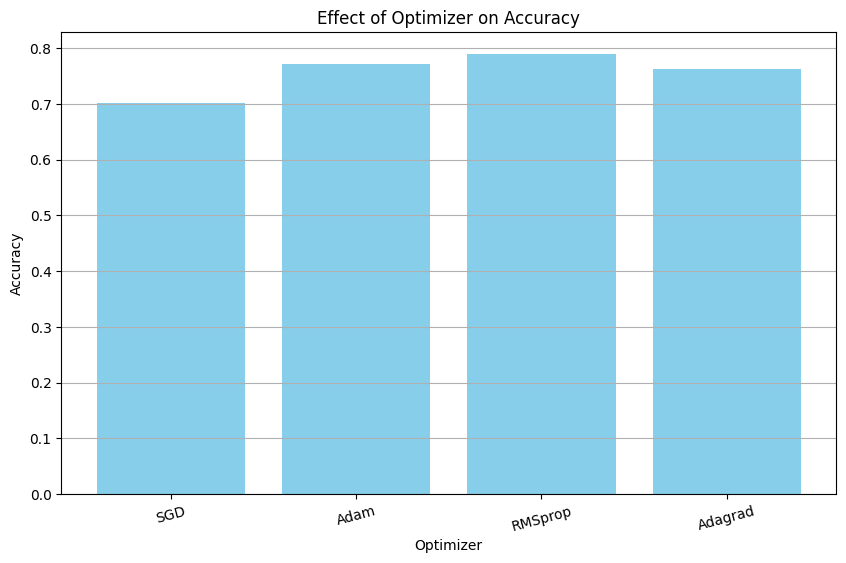

In [178]:
# Optimizers to test
optimizers = [
    ('SGD', optim.SGD),
    ('Adam', optim.Adam),
    ('RMSprop', optim.RMSprop),
    ('Adagrad', optim.Adagrad)
]

test_accuracies = []
accuracy_with_optimizer = []

for optimizer_name, optimizer_class in optimizers:
    print(f"Training with Optimizer: {optimizer_name}")

    # Define Hyperparameters
    loss_function = nn.BCELoss()

    # Initialize the optimizer with Part 1 learning rate, ie 0.0001
    optimizer = optimizer_class(model.parameters(), lr=0.001)
    best_model_path = "best_model_optimizer.pth"

    # Train
    train_loss, val_loss_list, val_acc_list, train_acc_list = train(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=50)

    # Load the best model
    model.load_state_dict(torch.load(best_model_path))

    # Test
    accuracy, precision, recall, f1, test_loss, y_true, y_pred, test_outputs = eval(model, X_test_tensor, y_test_tensor)

    # Combine accuracies
    test_accuracies.append(accuracy)

    # Store accuracy and corresponding optimizer
    accuracy_with_optimizer.append((optimizer_name, accuracy))

# Plot
plt.figure(figsize=(10, 6))
plt.bar([opt[0] for opt in accuracy_with_optimizer], test_accuracies, color='skyblue')
plt.title('Effect of Optimizer on Accuracy')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


In [179]:
# top 3 learning rates
accuracy_with_optimizer.sort(key=lambda x: x[1], reverse=True)

# Output the best three setups for learning rates
print("Top 3 Learning Rates with Best Test Accuracy:")
for i in range(3):
    print(f"Learning Rate: {accuracy_with_optimizer[i][0]}, Test Accuracy: {accuracy_with_optimizer[i][1]:.4f}")

Top 3 Learning Rates with Best Test Accuracy:
Learning Rate: RMSprop, Test Accuracy: 0.7895
Learning Rate: Adam, Test Accuracy: 0.7719
Learning Rate: Adagrad, Test Accuracy: 0.7632


Chosen Hyperparameter 2 :